## Predicting oil reserves and optimizing well placement using 
OilyGiant mining company has reservoir data containing oil well parameters for some selective basins/regions. As a data scientist, you've been hired to analyze reservoir data and build a model for predicting reserves in the new wells. You are tasked with optimizing well placement and maximizing profit. An important deliverable for this project is to analyze risks using the bootstrap technique.

#### Business Statement 
Production forecast and reserves estimate are an essential input in the decision-making and investment evaluation scheme for any oil company. Oil companies and reservoir asset managers must factor in the reserves, production forecasts, and estimated ultimate recovery in determining whether a production project will be viable and profitable or not. In addition to reservoir volume, operational risk management is another important metric for oil companies. To this end, we need to find the best well placement and build a model to predict the volume of reserves and maximize profit by picking the region with the highest total profit. The model developed will be useful as a basis for critical decision making during reservoir management and field development planning.

#### Task Statement
Find the best place for a new well. use the following steps to choose the location:

- Collect the oil well parameters in the selected region: oil quality and volume of reserves;
- Build a model for predicting the volume of reserves in the new wells;
- Pick the oil wells with the highest estimated values;
- Pick the region with the highest total profit for the selected oil wells.

You have data on oil samples from three regions. Parameters of each oil well in the region are already known. Build a model that will help to pick the region with the highest profit margin. Analyze potential profit and risks using the Bootstrapping technique.

## Data description
Geological exploration data for the three regions are stored in files:

- geo_data_0.csv
- geo_data_1.csv
- geo_data_2.csv
- *id* — unique oil well identifier
- *f0, f1, f2* — three features of points (their specific meaning is unimportant, but the features themselves are significant)
- *product* — volume of reserves in the oil well (thousand barrels).

#### Conditions
- Only linear regression is suitable for model training (the rest are not sufficiently predictable).
- When exploring the region, a study of 500 points is carried with picking the best 200 points for the profit calculation.
- The budget for development of 200 oil wells is 100 USD million.
- One barrel of raw materials brings 4.5 USD of revenue The revenue from one unit of product is 4,500 dollars (volume of reserves is in thousand barrels).
- After the risk evaluation, keep only the regions with the risk of losses lower than 2.5%. From the ones that fit the criteria, the region with the highest average profit should be selected.

The data is synthetic: contract details and well characteristics are not disclosed.

## Objectives
The objectives of this project is to:

- Optimize well placement
- Develop a model that would predicts the volume of reserves in the new wells
- Pick the oil well with the highest estimated reserve and the region with the highest total profit.

## Open the data file and study the general information

We require the following libraries: pandas and numpy for data preprocessing and manipulation, Scikit-Learn for building our learning algorithms

In [1]:
# import pandas and numpy for data preprocessing and manipulation
import numpy as np
import pandas as pd
from scipy import stats as st

# seaborn and matplotlib for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# import train_test_split to split data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
pd.options.mode.chained_assignment = None # to avoid SettingWithCopyWarning after scaling

# import machine learning module from the sklearn library
from sklearn.linear_model import LinearRegression # import linear regression 

# import regression metrics
from sklearn.metrics import explained_variance_score 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# import warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

print('Project libraries has been successfully been imported!')

Project libraries has been successfully been imported!


In [5]:
# read the data
try:
    geo_data_0 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_0.csv')
    geo_data_1 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_1.csv')
    geo_data_2 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_2.csv')
except:
    geo_data_0 = pd.read_csv('C:/Users/tresselg/Desktop/Data Science Work/Praktikum/Machine Learning for Business/Project/geo_data_0.csv')
    geo_data_1 = pd.read_csv('C:/Users/tresselg/Desktop/Data Science Work/Praktikum/Machine Learning for Business/Project/geo_data_1.csv')
    geo_data_2 = pd.read_csv('C:/Users/tresselg/Desktop/Data Science Work/Praktikum/Machine Learning for Business/Project/geo_data_2.csv')
print('Data has been read correctly!')

Data has been read correctly!


In [6]:
# function to determine if columns in file have null values
def get_percent_of_na(df, num):
    count = 0
    df = df.copy()
    s = (df.isna().sum() / df.shape[0])
    for column, percent in zip(s.index, s.values):
        num_of_nulls = df[column].isna().sum()
        if num_of_nulls == 0:
            continue
        else:
            count += 1
        print('Column {} has {:.{}%} percent of Nulls, and {} of nulls'.format(column, percent, num, num_of_nulls))
    if count != 0:
        print("\033[1m" + 'There are {} columns with NA.'.format(count) + "\033[0m")
    else:
        print()
        print("\033[1m" + 'There are no columns with NA.' + "\033[0m")
        
# function to display general information about the dataset
def get_info(df):
    """
    This function uses the head(), info(), describe(), shape() and duplicated() 
    methods to display the general information about the dataset.
    """
    print("\033[1m" + '-'*100 + "\033[0m")
    print('Head:')
    print()
    display(df.head())
    print('-'*100)
    print('Info:')
    print()
    display(df.info())
    print('-'*100)
    print('Describe:')
    print()
    display(df.describe())
    print('-'*100)
    display(df.describe(include='object'))
    print()
    print('Columns with nulls:')
    display(get_percent_of_na(df, 4))  # check this out
    print('-'*100)
    print('Shape:')
    print(df.shape)
    print('-'*100)
    print('Duplicated:')
    print("\033[1m" + 'We have {} duplicated rows.\n'.format(df.duplicated().sum()) + "\033[0m")
    print()

In [7]:
# study the general information about the dataset 
print('General information about the dataframe')
get_info(geo_data_0)
get_info(geo_data_1)
get_info(geo_data_2)

General information about the dataframe
----------------------------------------------------------------------------------------------------
Head:



,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


----------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

----------------------------------------------------------------------------------------------------
Describe:



,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


----------------------------------------------------------------------------------------------------


,id
count,100000
unique,99990
top,A5aEY
freq,2



Columns with nulls:

There are no columns with NA.


None

----------------------------------------------------------------------------------------------------
Shape:
(100000, 5)
----------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows.


----------------------------------------------------------------------------------------------------
Head:



,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


----------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

----------------------------------------------------------------------------------------------------
Describe:



,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


----------------------------------------------------------------------------------------------------


,id
count,100000
unique,99996
top,wt4Uk
freq,2



Columns with nulls:

There are no columns with NA.


None

----------------------------------------------------------------------------------------------------
Shape:
(100000, 5)
----------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows.


----------------------------------------------------------------------------------------------------
Head:



,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


----------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

----------------------------------------------------------------------------------------------------
Describe:



,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


----------------------------------------------------------------------------------------------------


,id
count,100000
unique,99996
top,VF7Jo
freq,2



Columns with nulls:

There are no columns with NA.


None

----------------------------------------------------------------------------------------------------
Shape:
(100000, 5)
----------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows.




In [8]:
# check correlation amongst variables for each region
def pairplot(df):
    cols = ['f0', 'f1', 'f2', 'product']
    ax = sns.pairplot(df, vars=cols)
    ax.fig.suptitle('Relationship between parameters for geological data', y=1.02);
    
# function to plot correlation matrix for each geological data
def corr_matrix(df, label):
    plt.figure(figsize=(8,6))
    corrMatrix = df.corr()
    sns.heatmap(corrMatrix, annot=True)
    plt.title('Correlation matrix for ' + label)
    plt.show()            

### Region 1 - geo_data_0

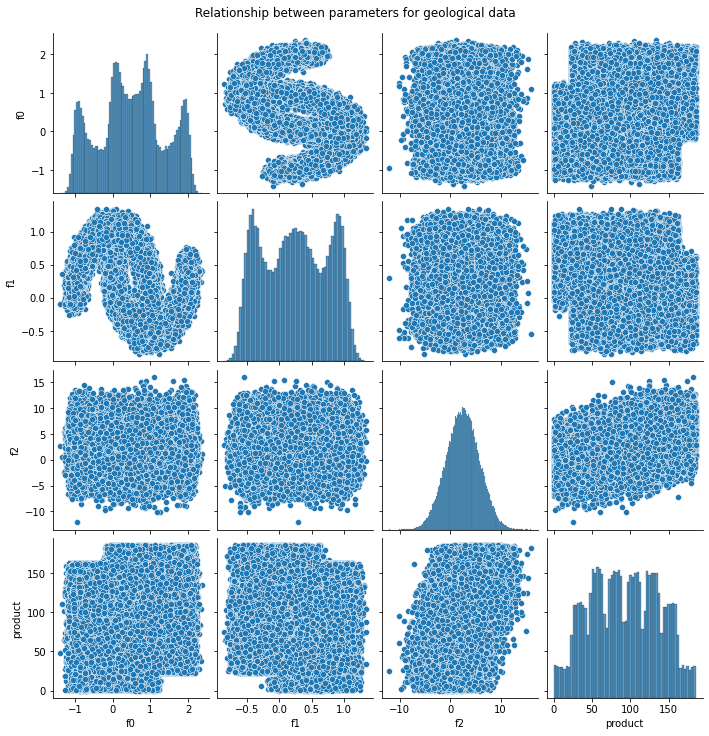

In [9]:
# pairplot for region 1
pairplot(geo_data_0)

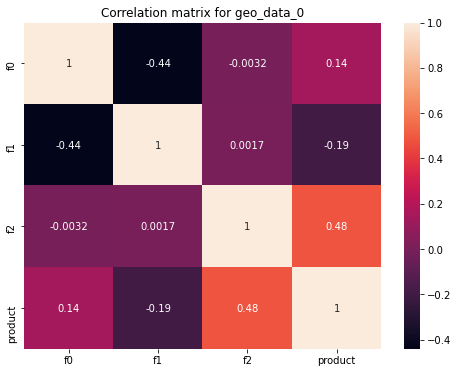

In [10]:
# correlation matrix
corr_matrix(geo_data_0, 'geo_data_0')

### Region 2 - geo_data_1

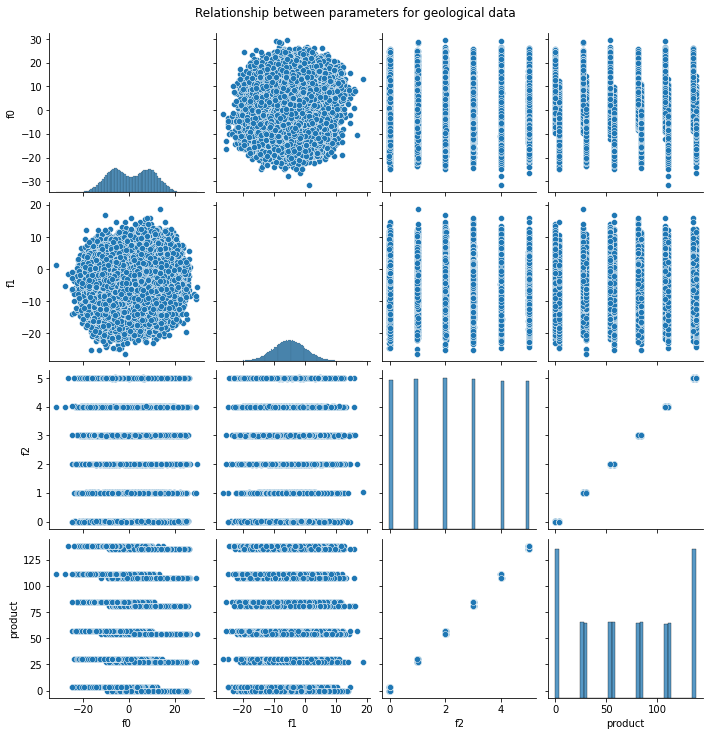

In [11]:
# pairplot for region 2
pairplot(geo_data_1)

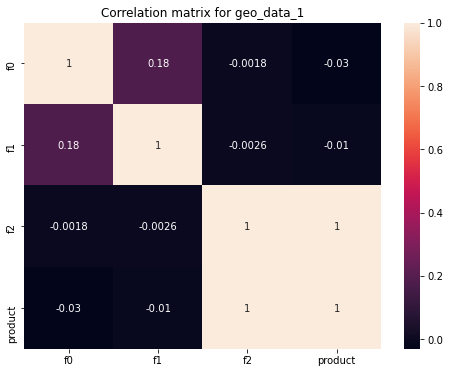

In [12]:
# correlation matrix for region 2
corr_matrix(geo_data_1, 'geo_data_1')

### Region 3 - geo_data_2

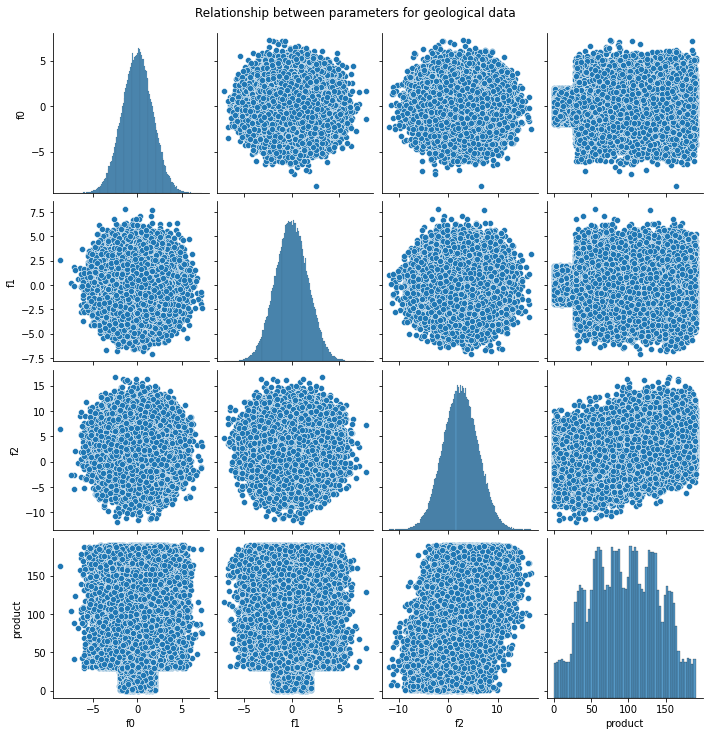

In [13]:
# pairplot for region 3
pairplot(geo_data_2)

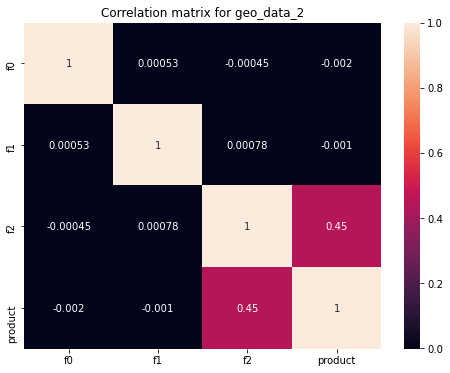

In [14]:
# correlation matrix for region 3
corr_matrix(geo_data_2, 'geo_data_2')

### Conclusion

From the general information about the dataset, we can see that the data does not have any missing values. We determined the pairplot and correlation matrix for each region in order to observe correlations amongst features in each region. We conclude that:

- In region 1, *f2* is normally distributed and has a high correlation of 0.48 to the *product*
- In region 2, *f2* is linearly correlated with *product*
- In region 3, *f0*, *f1*, and *f2* are all normally distributed. Also *f2* has a high correlation of 0.45 to the *product*


## Train and test the model for each region
We split the data into 75% training and 25% testing set. We then fit a linear model using the training data. Once the model is trained, we use it for prediction to predict the volume of reserves in the oil well (thousand barrels).

In [15]:
# function to train a model and make predictions
def train_test_predict(df):
    """ 
    This function declares variables for features and target,
    splits the data into train and test sets, trains the model
    and make predictions using linear regression algorithm
    """
    # drop unimportant features
    df = df.drop(['id'], axis=1)

    # declare variables for features and target
    target = df['product']
    features = df.drop(['product'], axis=1)

    # split data into 75% training and 25% testing sets
    features_train, features_test, target_train, target_test = train_test_split(
        features, target, test_size=0.25, random_state=12345
    )
    
    # features scaling
    scaler = StandardScaler()
    scaler.fit(features_train)
    # transform the training set and the test set using transform()
    features_train = scaler.transform(features_train)
    features_test  = scaler.transform(features_test)

    # linear regression model
    model = LinearRegression()
    model.fit(features_train, target_train) # train model
    test_predictions = pd.Series(model.predict(features_test), index=target_test.index) # make prediction using test set
    return test_predictions, target_test

# function to calculate regression metrics
def reg_metrics(y_test, y_pred):
    print('Mean absolute error: %.2f' % mean_absolute_error(y_test, y_pred))
    print('Explained variance score: %.4f' % explained_variance_score(y_test, y_pred))
    print('Mean squared error: %.3f' % mean_squared_error(y_test, y_pred))
    print("RMSE: %.4f" % np.sqrt(mean_squared_error(y_test, y_pred)))
    print('Variance score: %.4f' % r2_score(y_test, y_pred)) # coeff. of determination
    forecast_err = np.array(y_test) - np.array(y_pred)
    print('Forecast bias: %.4f' % (np.sum(forecast_err) * 1.0/len(y_pred)))

### Region 1 - geo_data_0

In [16]:
# store predictions and test data sets
test_predictions_0, target_test_0 = train_test_predict(geo_data_0)

# regression metric for region 1
reg_metrics(test_predictions_0, target_test_0)

Mean absolute error: 30.92
Explained variance score: -1.6286
Mean squared error: 1412.213
RMSE: 37.5794
Variance score: -1.6291
Forecast bias: 0.5140


In [17]:
# volume of predicted reserves and actual reserves
print('Average volume of reserves: %.2f' % target_test_0.mean())
print('The average volume of predicted reserves is: %.2f' % test_predictions_0.mean())
print("The model's RMSE is : %.4f" % np.sqrt(mean_squared_error(test_predictions_0, target_test_0)))

Average volume of reserves: 92.08
The average volume of predicted reserves is: 92.59
The model's RMSE is : 37.5794


### Region 2 - geo_data_1

In [18]:
# store predictions and test data sets
test_predictions_1, target_test_1 = train_test_predict(geo_data_1)

# regression metric for region 2
reg_metrics(test_predictions_1, target_test_1)

Mean absolute error: 0.72
Explained variance score: 0.9996
Mean squared error: 0.798
RMSE: 0.8931
Variance score: 0.9996
Forecast bias: 0.0054


In [19]:
# volume of predicted reserves and actual reserves
print('Average volume of reserves: %.2f' % target_test_1.mean())
print('The average volume of predicted reserves is: %.2f' % test_predictions_1.mean())
print("The model's RMSE is : %.4f" % np.sqrt(mean_squared_error(test_predictions_1, target_test_1)))

Average volume of reserves: 68.72
The average volume of predicted reserves is: 68.73
The model's RMSE is : 0.8931


### Region 3 - geo_data_2

In [20]:
# store predictions and test data sets
test_predictions_2, target_test_2 = train_test_predict(geo_data_2)

# regression metric for region 2
reg_metrics(test_predictions_2, target_test_2)

Mean absolute error: 32.79
Explained variance score: -3.0653
Mean squared error: 1602.378
RMSE: 40.0297
Variance score: -3.0653
Forecast bias: 0.0808


In [21]:
# volume of predicted reserves and actual reserves
print('Average volume of reserves: %.2f' % target_test_2.mean())
print('The average volume of predicted reserves is: %.2f' % test_predictions_2.mean())
print("The model's RMSE is : %.4f" % np.sqrt(mean_squared_error(test_predictions_2, target_test_2)))

Average volume of reserves: 94.88
The average volume of predicted reserves is: 94.97
The model's RMSE is : 40.0297


The summary of the result are:

|Regions |	Average Actual Reserve (in thousands STB)|	Average Predicted Reserve (in thousands STB)|	RMSE|	MAE|
| --- | --- | --- | --- | --- |
|Region 1 - geo_data_0|	92.08|	92.59|	37.58|	30.92|
|Region 2 - geo_data_1|	68.72|	68.73|	0.89|	0.72|
|Region 3 - geo_data_2|	94.88|	94.97|	40.03|	32.79|


#### Conclusion

We predicted the volume of reserves in the oil well (in thousand bbls). We also calculated different regression metrics. From the result, we can see that in region 1, the R2 metric is -1.62 which means the model quality is low, the mean error for each well is 30.92 thousand barrels, and the high RMSE value of 37.58 thousand barrels indicates that there may be outliers in the data. In essence, the model is overpredicting average reserves in region 1.

In region 2, the R2 metric is 0.9996 which indicates that the model quality is good. The low MAE value of 0.72 thousand barrels means that the model is a perfect predictor of the reserve in this region, and the low RMSE value of 0.89 thousand barrels indicates that the model is giving a prediction close to the actual reserve. In region 3, the R2 metric is very low at -3.06 indicating poor model quality in this region. The high MAE value of 32.79 thousand barrels, and high RMSE value of 40.03 thousand barrels indicate an overprediction of average value of reserves by the model in region 3.



## Prepare for profit calculation
#### Store key values in separate variables

In [24]:
# profit determination conditions
region_points = 500 # 500 oil wells required
best_region_for_profit = 200 # 200 oil wells 
capital_cost = 100 * 10**6 # development budget for 200 wells (100 USD million)
cost_per_bbl = 4.5 # revenue from 1 unit of product (in thousand barrels) = $4,500 
risk_of_losses = 0.025

Calculate the volume of reserves for developing new well without losses

In [25]:
# volume of reserves calculation
revenue = cost_per_bbl * best_region_for_profit
volume_of_reserves = capital_cost / revenue
print('The volume of reserves required to develop a new well without loss: %.2f' % volume_of_reserves, 'Stock Tank Barrels (STB).')

The volume of reserves required to develop a new well without loss: 111111.11 Stock Tank Barrels (STB).


#### Conclusion

We calculated the volume of reserves sufficient to develop a new well without loss as 111.11 thousand barrels. This volume will be our baseline value. In comparing this value to the average volume of reserves in each region, we can see that average volume of reserves in each region is lower than 111.11 thousand barrels.

## Write a function to calculate profit from a set of selected oil wells and model predictions

In [26]:
# function to calculate the highest prediction in each region
def highest_prediction(y_test, y_pred, count):
    highest_reserves_volume_predicted = y_pred.sort_values(ascending=False)
    selected_reserves_volume_target = y_test[highest_reserves_volume_predicted.index][:count]
    total_selected_reserves_volume_target = selected_reserves_volume_target.sum() * 1000
    print('The highest prediction value in this region is: %.2f' % total_selected_reserves_volume_target,
          'STB or %.2f' % (total_selected_reserves_volume_target / 10**6), 'MMSTB')

# function to calculate profit from a set of selected oil wells and model predictions
def reserves_profit(y_test, y_pred, count):
    highest_reserves_volume_predicted = y_pred.sort_values(ascending=False)
    selected_reserves_volume_target = y_test[highest_reserves_volume_predicted.index][:count]
    total_selected_reserves_volume_target = selected_reserves_volume_target.sum() * 1000
    selected_reserves_profit = total_selected_reserves_volume_target * cost_per_bbl - capital_cost
    print('The selected reserves profit is: $%.2f' % selected_reserves_profit)

#### Region with the highest values of predictions
In this section, we look at all three regions to see which one gives the highest value of predictions

### Region 1 - geo_data_0

In [27]:
# highest value prediction in region 1
highest_prediction(target_test_0, test_predictions_0, 200)

The highest prediction value in this region is: 29601835.65 STB or 29.60 MMSTB


### Region 2 - geo_data_1

In [28]:
# highest value prediction in region 2
highest_prediction(target_test_1, test_predictions_1, 200)

The highest prediction value in this region is: 27589081.55 STB or 27.59 MMSTB


### Region 3 - geo_data_2

In [29]:
# highest value prediction in region 3
highest_prediction(target_test_2, test_predictions_2, 200)

The highest prediction value in this region is: 28245222.14 STB or 28.25 MMSTB


From the calculation on highest values of prediction, we can see that Region 1 - geo_data_0 has the highest prediction of the three regions. Region 1 - geo_data_0 has the highest estimated reserve among the three regions.

#### Profit for obtained volume of reserves in each region
We look at the profit from each region in this section.

### Region 1 - geo_data_0

In [30]:
# profit from a set of selected oil wells and model predictions in region 1
reserves_profit(target_test_0, test_predictions_0, 200)

The selected reserves profit is: $33208260.43


### Region 2 - geo_data_1

In [31]:
# profit from a set of selected oil wells and model predictions in region 2
reserves_profit(target_test_1, test_predictions_1, 200)

The selected reserves profit is: $24150866.97


### Region 3 - geo_data_2

In [32]:
# profit from a set of selected oil wells and model predictions in region 3
reserves_profit(target_test_2, test_predictions_2, 200)

The selected reserves profit is: $27103499.64


The region with the highest profit is Region 1 - geo_data_0 with 33 million USD. We recommend OilyGiant mining company to channel more drilling activities in this region.

## Calculate risks and profit for each region
#### Use bootstrapping technique to find distribution of profit

In [33]:
# compute distribution of profits
def revenue(y_test, y_pred, count):
    highest_reserves_volume_predicted = y_pred.sort_values(ascending=False)
    selected_reserves_volume_target = y_test[highest_reserves_volume_predicted.index][:count]
    total_selected_reserves_volume_target = selected_reserves_volume_target.sum() * 1000
    selected_reserves_profit = total_selected_reserves_volume_target * cost_per_bbl - capital_cost
    return selected_reserves_profit

# compute profit from 1000 samples of revenue using bootstrapping technique
def bootstrapping_revenue(y_test, y_pred):
    state = np.random.RandomState(12345) 
    
    # store the 99% quantile values to the profit variable
    profit = []
    for i in range(1000):
        target_subsample = y_test.sample(n=region_points, replace=True, random_state=state)
        predicted_subsample = y_pred[target_subsample.index]
        profit.append(revenue(target_subsample, predicted_subsample, best_region_for_profit))
    return pd.Series(profit)

# compute bootstrap profit, confidence interval and risk of losses
def bootstrap_profit_ci_risk(y_test, y_pred):
    profit = bootstrapping_revenue(y_test, y_pred) # change type for convenience
    mean_profit = profit.mean() # average profit
    confidence_interval = st.t.interval(
        0.95, len(profit)-1, mean_profit, profit.sem()
    ) # 95% C.I.
    losses = profit[profit < 0]
    risk_of_losses = len(losses) / len(profit)
    print('The average profit is: %.2f' % mean_profit)
    print('The 95% confidence interval: ', confidence_interval)
    print('The risk of losses is: {:.2%}'.format(risk_of_losses))

Average Profit, 95% C.I. and risk of losses determination in each region
We look at the average profit, 95% confidence intervals, and risk of losses in each region in this section

### Region 1 - geo_data_0

In [34]:
# average profit, 95% C.I., and risk in region 1
bootstrap_profit_ci_risk(target_test_0, test_predictions_0)

The average profit is: 4259385.27
The 95% confidence interval:  (4087322.0706869904, 4431448.467524866)
The risk of losses is: 6.00%


### Region 2 - geo_data_1

In [35]:
# average profit, 95% C.I., and risk in region 1
bootstrap_profit_ci_risk(target_test_1, test_predictions_1)

The average profit is: 5152227.73
The 95% confidence interval:  (5016214.761763219, 5288240.707102582)
The risk of losses is: 1.00%


### Region 3 - geo_data_2

In [36]:
# average profit, 95% C.I., and risk in region 3
bootstrap_profit_ci_risk(target_test_2, test_predictions_2)

The average profit is: 4350083.63
The 95% confidence interval:  (4174535.520413581, 4525631.735241537)
The risk of losses is: 6.40%


#### Distribution of profit from the bootstrapping technique

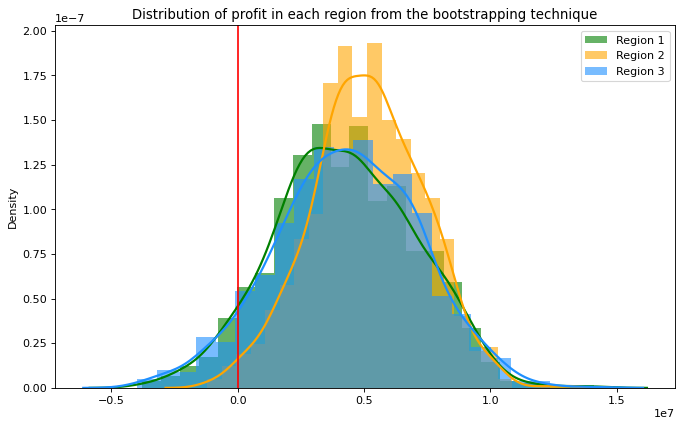

In [37]:
# profit from each region
region_1_profit = bootstrapping_revenue(target_test_0, test_predictions_0)
region_2_profit = bootstrapping_revenue(target_test_1, test_predictions_1)
region_3_profit = bootstrapping_revenue(target_test_2, test_predictions_2)

# distribution plot
kwargs = dict(hist_kws={'alpha': 0.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,6), dpi= 80)
sns.distplot(region_1_profit, color='green', label='Region 1', **kwargs)
sns.distplot(region_2_profit, color='orange', label='Region 2', **kwargs)
sns.distplot(region_3_profit, color='dodgerblue', label='Region 3', **kwargs)
plt.axvline(0, c="r")
plt.title('Distribution of profit in each region from the bootstrapping technique')
plt.legend();

From the use of bootstrapping technique to determine the distribution of profit, we observe that Region 2 - geo_data_1 has the highest distribution of profit than any other region. We computed the average profit and observed that Region 2 - geo_data_1 has the highest average profit and the lowest risk of losses. A summary of the result is shown below.

|Regions|	Average Profit (USD)|	95% C.I.	|Risk of losses|
| --- | --- | --- | --- |
|Region 1 - geo_data_0	|4259385.27|	(4087322.07, 4431448.47)|	6.00%|
|Region 2 - geo_data_1|	5152227.73|	(5016214.76, 5288240.71)|	1.00%|
|Region 3 - geo_data_2|	4350083.63|	(4174535.52, 4525631.74)|	6.40%|

## Overall conclusion
We downloaded the data and looked at the general information about the dataset. We observed that the data does not have any missing values. We noted that each region contains 100000 rows and 3 features. We plotted the pairplot and correlation matrix for each region in order to observe correlations amongst features in each region. We conclude that:

In region 1, *f2* is normally distributed and has a high correlation of 0.48 to the product
In region 2, *f2* is linearly correlated with product
In region 3, *f0, f1, and f2* are all normally distributed. Also *f2* has a high correlation of 0.45 to the product.
We then split the data into 75% training set, and 25% testing set. Since the features have different scales, we standardized the numerical features of the data. The size of the new table is 75000 rows and 3 features for the train features set, and 25000 rows and 3 features for the test features set. We trained the model and made predictions using a linear regression algorithm. We predicted the volume of reserves in the oil well (in thousand bbls). We also calculated different regression metrics. From the result, we can see that in region 1, the R2 metric is -1.62 which means the model quality is low, the mean error for each well is 30.92 thousand barrels, and the high RMSE value of 37.58 thousand barrels indicates that there may be outliers in the data. In essence, the model is overpredicting average reserves in region 1.

In region 2, the R2 metric is 0.9996 which indicates that the model quality is good. The low MAE value of 0.72 thousand barrels means that the model is a perfect predictor of the reserve in this region, and the low RMSE value of 0.89 thousand barrels indicates that the model is giving a prediction close to the actual reserve. In region 3, the R2 metric is very low at -3.06 indicating poor model quality in this region. The high MAE value of 32.79 thousand barrels, and high RMSE value of 40.03 thousand barrels indicate an overprediction of average value of reserves by the model in region 3.

We calculated the volume of reserves sufficient to develop a new well without loss as 111.11 thousand barrels. In comparing this value to the average volume of reserves in each region, we can see that average volume of reserves in each region is lower than 111.11 thousand barrels. We developed a function to calculate profit from a set of selected oil wells and model predictions. From the calculation on highest values of prediction, we can see that Region 1 - geo_data_0 has the highest prediction of the three regions. Region 1 - geo_data_0 has the highest estimated reserve among the three regions, and the highest profit of 33 million USD. Based on this, Region 1 - geo_data_0 looks like a promising region to continue more drilling activities.

We applied the bootstrapping technique to find the distribution of profit. We computed the average profit, 95% confidence interval, and risk of losses. From the calculations done, we observed that Region 2 - geo_data_1 has the highest distribution of profit, highest average profit and the lowest risk of losses than any other region. Based on the foregoing, we recommend that OilyGiant mining company should focus more oil wells' development activities in Region 2 - geo_data_1. This is because Region 2 - geo_data_1 generated the highest average profit than other regions with a risk of losses lower than 2.5%.

At the end of this project, we were able to develop a model that can optimize well placement, predict the volume of reserves in new wells, pick the oil wells with the highest estimated reserve, and the region with the highest total profit. This machine learning model is useful and will serve as an aid in determining whether a production project will be viable and profitable or not. This will help OilyGiant mining company and reservoir asset managers during the decision-making process on whether to proceed with the development of a hydrocarbon reservoir and/or region on which studies are being conducted.